In [ ]:
## Wherever u edit, please comment it with your name for future reference.
### If you think you have completed a milestone, please download the file and save it to your local machine for future reference. 

### Streamlit for visualization
### 1. First unsupervised models
# Traffic patterns in unsupervides, clustering -  in different time range, similarities between clusters and differences
# 2. Then supervised models
# 3. Time series, naive bayes
# 4. BOX-Plots
# 5. ARIMA, Prophet
# 6. Refer Week3 Time series Process
#     1. https://colab.research.google.com/drive/15kYEj-Nu7VpKpILuHSgEqOENMcxgMBg4?authuser=1
#     2. By seson, hours, months, year
#     3. Performance Matrix
#     4. Streamlit, dash 
#     5. statsmodel.tsa.statstool library for time series
#     6. Dont forget smoothing
#     7. Rsquare -  85-90
#     8. 85% accuracy


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import sklearn 
# print(sklearn.__version__)

In [ ]:
## Import File Below this block
import pandas as pd
df = pd.read_csv("/content/gdrive/MyDrive/602 project/aviation_data_merged.csv")
# df = pd.read_csv('/Users/dakshintwala/Fall22/DATA 602/Project 602/aviation_data_merged.csv')

In [2]:
# #Hinal
import pandas as pd
df = pd.read_csv("aviation_data_merged.csv")
df.head()

,date,hour,runway,weather,dep_eff_comp,arr_eff_comp,total_eff_comp,dep_facility_rep,arr_facility_rep,total_facility_rep,...,per_ontime_arp_dep,per_ontime_gate_arr,avg_gate_dep_delay,avg_taxi_out_time,avg_taxi_out_delay,avg_arp_dep_delay,avg_airborn_delay,avg_tax_in_dealy,avg_block_delay,avg_gate_arr_delay
0,1/1/22,0.0,22L | 22R,IMC,5,10,15,0,0,0,...,0.0,66.67,110.50,12.00,0.00,109.5,3.22,4.22,2.89,14.22
1,1/1/22,1.0,22L | 22R,IMC,2,3,5,0,0,0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2,1/1/22,2.0,22L | 22R,IMC,0,0,0,0,0,0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
3,1/1/22,3.0,22L | 22R,IMC,1,1,2,0,0,0,...,0.0,60.00,0.00,0.00,0.00,0.0,1.00,0.98,3.60,43.80
4,1/1/22,4.0,22L | 22R,IMC,0,2,2,0,0,0,...,100.0,66.67,0.25,14.25,2.15,1.0,15.83,2.20,18.67,38.50


In [3]:
## Prerequisite Library
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
df.head()

,date,hour,runway,weather,dep_eff_comp,arr_eff_comp,total_eff_comp,dep_facility_rep,arr_facility_rep,total_facility_rep,...,per_ontime_arp_dep,per_ontime_gate_arr,avg_gate_dep_delay,avg_taxi_out_time,avg_taxi_out_delay,avg_arp_dep_delay,avg_airborn_delay,avg_tax_in_dealy,avg_block_delay,avg_gate_arr_delay
0,1/1/22,0.0,22L | 22R,IMC,5,10,15,0,0,0,...,0.0,66.67,110.50,12.00,0.00,109.5,3.22,4.22,2.89,14.22
1,1/1/22,1.0,22L | 22R,IMC,2,3,5,0,0,0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2,1/1/22,2.0,22L | 22R,IMC,0,0,0,0,0,0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
3,1/1/22,3.0,22L | 22R,IMC,1,1,2,0,0,0,...,0.0,60.00,0.00,0.00,0.00,0.0,1.00,0.98,3.60,43.80
4,1/1/22,4.0,22L | 22R,IMC,0,2,2,0,0,0,...,100.0,66.67,0.25,14.25,2.15,1.0,15.83,2.20,18.67,38.50


In [ ]:
df.describe()

,hour,avg_cap,cap_utilized_percent,dep_eff,arr_eff,saer,per_ontime_gate_dep,per_ontime_arp_dep,per_ontime_gate_arr,avg_gate_dep_delay,avg_taxi_out_time,avg_taxi_out_delay,avg_arp_dep_delay,avg_airborn_delay,avg_tax_in_dealy,avg_block_delay,avg_gate_arr_delay
count,5832.00000,5833.000000,5833.000000,5833.000000,5833.000000,5833.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000
mean,11.50000,76.660895,58.146403,91.287833,95.594646,93.156983,61.381930,48.568106,65.664989,20.494901,20.086721,8.944042,28.082914,3.337699,6.216476,5.597406,20.955903
std,6.92278,8.437916,29.754681,12.450909,10.136614,9.815878,30.441751,31.592384,27.231230,24.576788,10.963796,9.070444,29.757648,5.510457,5.923113,8.085037,25.191452
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.75000,78.000000,32.500000,87.730000,95.650000,90.910000,44.830000,21.740000,52.940000,4.970000,15.970000,3.610000,9.000000,1.000000,2.560000,1.470000,6.180000
50%,11.50000,80.000000,67.500000,95.220000,100.000000,96.150000,69.230000,51.160000,73.530000,13.890000,19.660000,7.200000,21.000000,2.400000,4.770000,3.530000,13.600000
75%,17.25000,80.000000,81.250000,100.000000,100.000000,100.000000,84.620000,74.070000,85.000000,26.980000,23.970000,11.450000,36.720000,3.920000,8.120000,6.870000,26.440000
max,23.00000,94.000000,140.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,237.000000,103.000000,90.400000,277.400000,153.040000,86.680000,157.270000,354.550000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  5832 non-null   object 
 1   hour                  5832 non-null   float64
 2   runway                5741 non-null   object 
 3   weather               5832 non-null   object 
 4   dep_eff_comp          5833 non-null   object 
 5   arr_eff_comp          5833 non-null   object 
 6   total_eff_comp        5833 non-null   object 
 7   dep_facility_rep      5833 non-null   object 
 8   arr_facility_rep      5833 non-null   object 
 9   total_facility_rep    5833 non-null   object 
 10  dep_demand_units      5833 non-null   object 
 11  arr_demand_units      5833 non-null   object 
 12  total_demand_units    5833 non-null   object 
 13  eff_aar               5833 non-null   object 
 14  adr                   5833 non-null   object 
 15  cap_aar              

## Data Clean up and Sanity Checks

In [ ]:
#installing libraries
!pip install missingno
!pip install pendulum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 155 kB 27.2 MB/s 
     |████████████████████████████████| 489 kB 43.3 MB/s 


In [5]:
import missingno as msno
import pendulum as pdl

In [ ]:
#Find number of non-null values and data type of each column in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  5832 non-null   object 
 1   hour                  5832 non-null   float64
 2   runway                5741 non-null   object 
 3   weather               5832 non-null   object 
 4   dep_eff_comp          5833 non-null   object 
 5   arr_eff_comp          5833 non-null   object 
 6   total_eff_comp        5833 non-null   object 
 7   dep_facility_rep      5833 non-null   object 
 8   arr_facility_rep      5833 non-null   object 
 9   total_facility_rep    5833 non-null   object 
 10  dep_demand_units      5833 non-null   object 
 11  arr_demand_units      5833 non-null   object 
 12  total_demand_units    5833 non-null   object 
 13  eff_aar               5833 non-null   object 
 14  adr                   5833 non-null   object 
 15  cap_aar              

Now we see that the Date column is not in the correct format. So we work on converting it to a readable format. Also, since we are going to use time series analysis, it is a better option to make the date column as the index.

In [6]:
# Avoiding null rows 
df = df.iloc[:-5,:]

date_col = df['date']+" "+df['hour'].astype(int).astype(str)

## Parsing date_col to pdl.datetime format
for i in range(len(df)):
  temp = date_col[i]
  temp = pdl.from_format(temp, 'MM/DD/YY HH')
  df['date'][i] = temp

# Reindexing the df with newly converted datetime format column
df.index = df['date']

# Droping extra column
df = df.drop(['date', 'hour'], axis=1)

C:\Users\hinal\AppData\Local\Temp/ipykernel_29688/563911194.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][i] = temp


In [ ]:
df.head()

,runway,weather,dep_eff_comp,arr_eff_comp,total_eff_comp,dep_facility_rep,arr_facility_rep,total_facility_rep,dep_demand_units,arr_demand_units,...,per_ontime_arp_dep,per_ontime_gate_arr,avg_gate_dep_delay,avg_taxi_out_time,avg_taxi_out_delay,avg_arp_dep_delay,avg_airborn_delay,avg_tax_in_dealy,avg_block_delay,avg_gate_arr_delay
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00+00:00,22L | 22R,IMC,5,10,15,0,0,0,5,11,...,0.0,66.67,110.50,12.00,0.00,109.5,3.22,4.22,2.89,14.22
2022-01-01 01:00:00+00:00,22L | 22R,IMC,2,3,5,0,0,0,2,3,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2022-01-01 02:00:00+00:00,22L | 22R,IMC,0,0,0,0,0,0,0,0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2022-01-01 03:00:00+00:00,22L | 22R,IMC,1,1,2,0,0,0,1,1,...,0.0,60.00,0.00,0.00,0.00,0.0,1.00,0.98,3.60,43.80
2022-01-01 04:00:00+00:00,22L | 22R,IMC,0,2,2,0,0,0,0,2,...,100.0,66.67,0.25,14.25,2.15,1.0,15.83,2.20,18.67,38.50


Now we check whether there are any columns that have same value for all the rows

In [ ]:
counter = 0
for this_column in df.columns:
    if (df[this_column].nunique()==1):
        print(this_column)
        counter = 1
if(counter != 1):
    print('There are no such columns having the same value for all the rows.')

There are no such columns having the same value for all the rows.


Now lets get the number of uniques values per column and their counts

In [ ]:
#function to number of unique values and its count for all columns in a data frame
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

In [ ]:
uniq_per_col(df,5)

====  runway has 15 unique entries ====
22L | 22R        2776
4R | 4L          1782
29 | 22R          272
11, 22L | 22R     219
22R | 22R         196
Name: runway, dtype: int64
====  weather has 2 unique entries ====
VMC    4849
IMC     983
Name: weather, dtype: int64
====  dep_eff_comp has 52 unique entries ====
0     306
33    202
31    201
1     196
30    196
Name: dep_eff_comp, dtype: int64
====  arr_eff_comp has 50 unique entries ====
27    242
30    224
29    214
31    197
28    196
Name: arr_eff_comp, dtype: int64
====  total_eff_comp has 86 unique entries ====
63    155
65    150
66    146
60    143
62    141
Name: total_eff_comp, dtype: int64
====  dep_facility_rep has 52 unique entries ====
0     1744
31     211
33     208
28     192
27     189
Name: dep_facility_rep, dtype: int64
====  arr_facility_rep has 49 unique entries ====
0     1741
27     226
30     222
29     208
28     206
Name: arr_facility_rep, dtype: int64
====  total_facility_rep has 83 unique entries ====
0   

Now lets find the percentage of null values in each column

In [ ]:
df.isnull().sum()/len(df)*100

runway                  1.560357
weather                 0.000000
dep_eff_comp            0.000000
arr_eff_comp            0.000000
total_eff_comp          0.000000
dep_facility_rep        0.000000
arr_facility_rep        0.000000
total_facility_rep      0.000000
dep_demand_units        0.000000
arr_demand_units        0.000000
total_demand_units      0.000000
eff_aar                 0.000000
adr                     0.000000
cap_aar                 0.000000
adr_plus_cap_aar        0.000000
avg_cap                 0.000000
cap_utilized_percent    0.000000
dep_eff                 0.000000
arr_eff                 0.000000
saer                    0.000000
sched_dep               0.600137
sched_arr               0.600137
dep_metric_comp         0.600137
arr_metric_comp         0.600137
per_ontime_gate_dep     0.600137
per_ontime_arp_dep      0.600137
per_ontime_gate_arr     0.600137
avg_gate_dep_delay      0.600137
avg_taxi_out_time       0.600137
avg_taxi_out_delay      0.600137
avg_arp_de

From the above observation it is clear that, we have a good variety of data. We have minimal null values in the data. Hence we can conclude that we have good data. But we still can work on the data types of object type columns.

In [ ]:
#find number of unique values in various object type columns
count = 10
for col,col_type in df.dtypes.iteritems():
    if(col_type=='object'):
        print('\n',col,'has',df[col].nunique(),'unique entries; and the top unique values are ')
        print(df[col].value_counts().head(count))


 runway has 15 unique entries; and the top unique values are 
22L | 22R        2776
4R | 4L          1782
29 | 22R          272
11, 22L | 22R     219
22R | 22R         196
4L | 4L           170
4R | 4R           118
22L | 22L         105
4R, 11 | 4L        72
22R, 29 | 22R      17
Name: runway, dtype: int64

 weather has 2 unique entries; and the top unique values are 
VMC    4849
IMC     983
Name: weather, dtype: int64

 dep_eff_comp has 52 unique entries; and the top unique values are 
0     306
33    202
31    201
1     196
30    196
29    196
27    194
25    188
28    185
35    182
Name: dep_eff_comp, dtype: int64

 arr_eff_comp has 50 unique entries; and the top unique values are 
27    242
30    224
29    214
31    197
28    196
26    195
32    195
1     192
25    187
2     186
Name: arr_eff_comp, dtype: int64

 total_eff_comp has 86 unique entries; and the top unique values are 
63    155
65    150
66    146
60    143
62    141
67    140
64    138
61    129
69    128
59    125


From the above observations it is clear that the datatypes of the columns 'runway', and 'weather' can be converted to 'Categorical' from 'object' and the rest to numeric

In [7]:
## Handling Null Values
df=df[:-36]

In [8]:
#update the datatype of the above columns
df['runway'] = df['runway'].astype('category')
df['weather'] = df['weather'].astype('category')

df[['dep_eff_comp','arr_eff_comp',
    'total_eff_comp','dep_facility_rep',
    'arr_facility_rep','total_facility_rep',
    'dep_demand_units','arr_demand_units',
    'total_demand_units','eff_aar',
    'adr','cap_aar',
    'adr_plus_cap_aar',
    'sched_dep','sched_arr',
    'dep_metric_comp','arr_metric_comp']]= df[['dep_eff_comp','arr_eff_comp',
                                               'total_eff_comp','dep_facility_rep',
                                               'arr_facility_rep','total_facility_rep',
                                               'dep_demand_units','arr_demand_units',
                                               'total_demand_units','eff_aar','adr',
                                               'cap_aar','adr_plus_cap_aar','sched_dep',
                                               'sched_arr','dep_metric_comp','arr_metric_comp']].apply(pd.to_numeric)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5796 entries, 2022-01-01 00:00:00+00:00 to 2022-08-30 11:00:00+00:00
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   runway                5705 non-null   category
 1   weather               5796 non-null   category
 2   dep_eff_comp          5796 non-null   int64   
 3   arr_eff_comp          5796 non-null   int64   
 4   total_eff_comp        5796 non-null   int64   
 5   dep_facility_rep      5796 non-null   int64   
 6   arr_facility_rep      5796 non-null   int64   
 7   total_facility_rep    5796 non-null   int64   
 8   dep_demand_units      5796 non-null   int64   
 9   arr_demand_units      5796 non-null   int64   
 10  total_demand_units    5796 non-null   int64   
 11  eff_aar               5796 non-null   int64   
 12  adr                   5796 non-null   int64   
 13  cap_aar               5796 non-null   int64   
 14  adr_plus

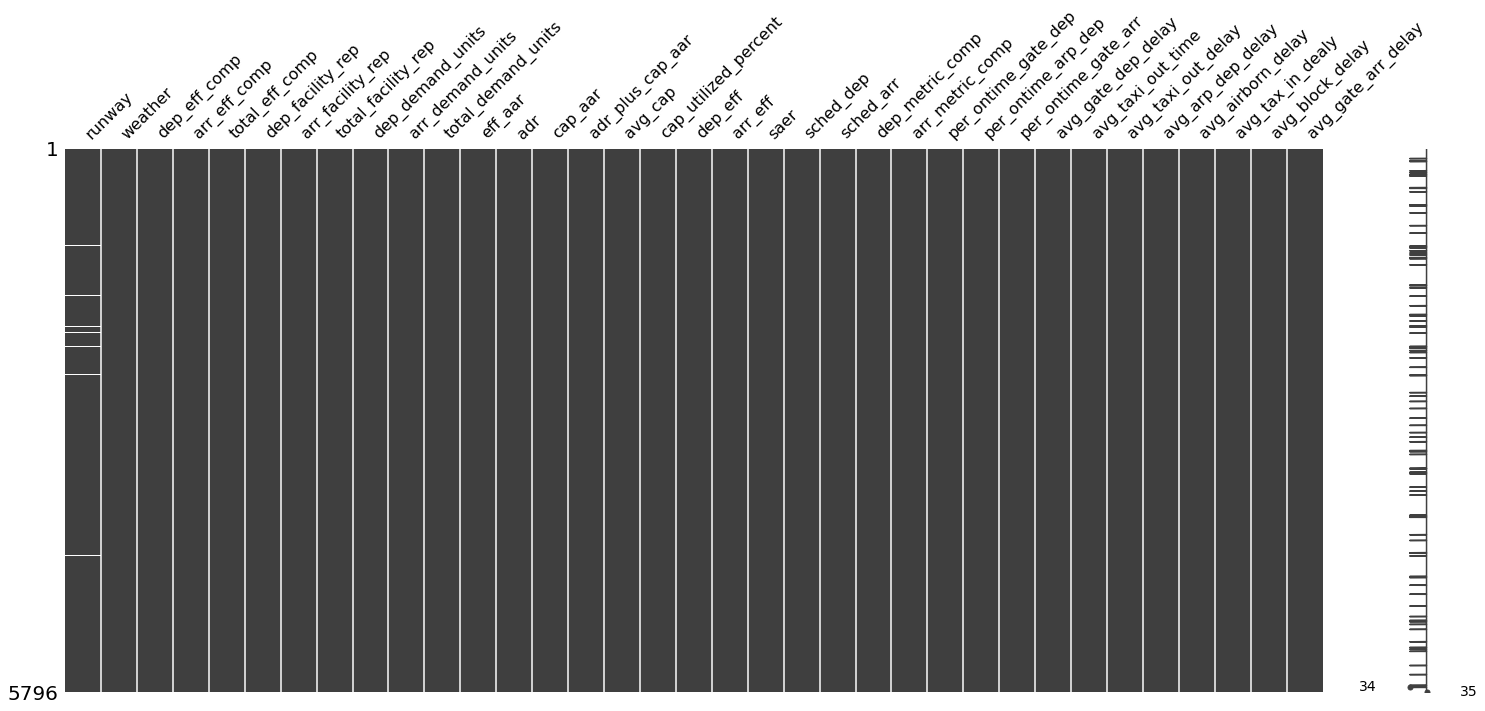

In [ ]:
_=msno.matrix(df.sample(df.shape[0]))
#Black = filled; white = empty

#### Report

The date column needed formatting. Also, we converted the date column as index for ease of processing.
There were no columns where all the rows had the same value.
There were no columns where all the rows were null.
Hence there was no need to drop any column.
There were a few columns viz 'runway' and 'weather' which had categorical data and hence their data type was updated for better functioning.
There were a few columns that had t be converted to numeric type.
There was very less data that had null values and hence it was not harmfull and needed no action.
The data is now clean and ready for analysis.

In [ ]:
## EDA

In [ ]:
df.corr()

,dep_eff_comp,arr_eff_comp,total_eff_comp,dep_facility_rep,arr_facility_rep,total_facility_rep,dep_demand_units,arr_demand_units,total_demand_units,eff_aar,...,per_ontime_arp_dep,per_ontime_gate_arr,avg_gate_dep_delay,avg_taxi_out_time,avg_taxi_out_delay,avg_arp_dep_delay,avg_airborn_delay,avg_tax_in_dealy,avg_block_delay,avg_gate_arr_delay
dep_eff_comp,1.000000,0.758646,0.944734,0.944068,0.765455,0.891424,0.801592,0.510329,0.757089,0.305030,...,-0.058894,-0.008974,0.116487,0.138394,0.121946,0.132898,0.062139,0.135141,0.099294,0.079115
arr_eff_comp,0.758646,1.000000,0.930306,0.747085,0.929087,0.870256,0.596118,0.702656,0.746273,0.346845,...,-0.093666,-0.027280,0.151743,0.158845,0.148614,0.170572,0.077199,0.180863,0.129155,0.099858
total_eff_comp,0.944734,0.930306,1.000000,0.907428,0.898456,0.939770,0.751250,0.640884,0.801754,0.346259,...,-0.080289,-0.018780,0.141937,0.157845,0.143436,0.160652,0.073830,0.167093,0.120892,0.094789
dep_facility_rep,0.944068,0.747085,0.907428,1.000000,0.846626,0.962498,0.773279,0.517454,0.744611,0.283300,...,-0.066444,-0.001429,0.116585,0.136631,0.120257,0.133019,0.059405,0.135250,0.099124,0.083201
arr_facility_rep,0.765455,0.929087,0.898456,0.846626,1.000000,0.959253,0.617644,0.667842,0.739090,0.309062,...,-0.102621,-0.022325,0.145989,0.149974,0.140420,0.163981,0.072873,0.173005,0.126207,0.102615
total_facility_rep,0.891424,0.870256,0.939770,0.962498,0.959253,1.000000,0.725400,0.615168,0.772089,0.307958,...,-0.087589,-0.012139,0.136317,0.148992,0.135428,0.154214,0.068687,0.159999,0.116963,0.096482
dep_demand_units,0.801592,0.596118,0.751250,0.773279,0.617644,0.725400,1.000000,0.510774,0.873102,0.115501,...,-0.102802,-0.068528,0.134991,0.116873,0.115537,0.148218,0.051959,0.160796,0.118609,0.101980
arr_demand_units,0.510329,0.702656,0.640884,0.517454,0.667842,0.615168,0.510774,1.000000,0.865101,0.007301,...,-0.129294,-0.107848,0.186196,0.113707,0.111315,0.191195,0.086599,0.207955,0.161973,0.152245
total_demand_units,0.757089,0.746273,0.801754,0.744611,0.739090,0.772089,0.873102,0.865101,1.000000,0.071529,...,-0.133301,-0.101142,0.184350,0.132672,0.130535,0.194902,0.079425,0.211746,0.161056,0.145837
eff_aar,0.305030,0.346845,0.346259,0.283300,0.309062,0.307958,0.115501,0.007301,0.071529,1.000000,...,0.020710,0.070816,0.001405,0.083678,0.077856,0.022322,0.033036,0.014741,0.019606,-0.006437


In [ ]:
corr= df.corr()
to_drop = [column for column in corr.columns if any(corr[column] < 0.70)]


In [ ]:
# sns.pairplot(df)

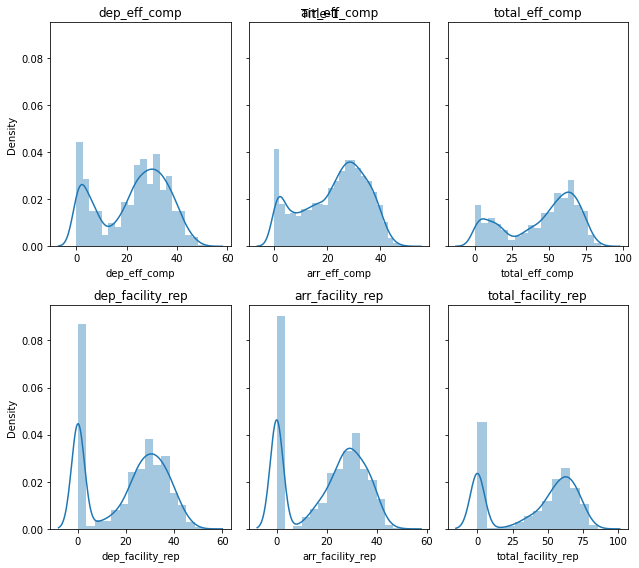

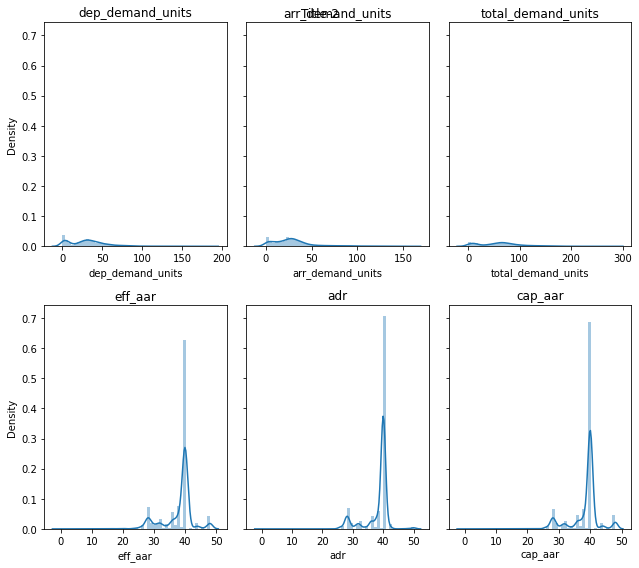

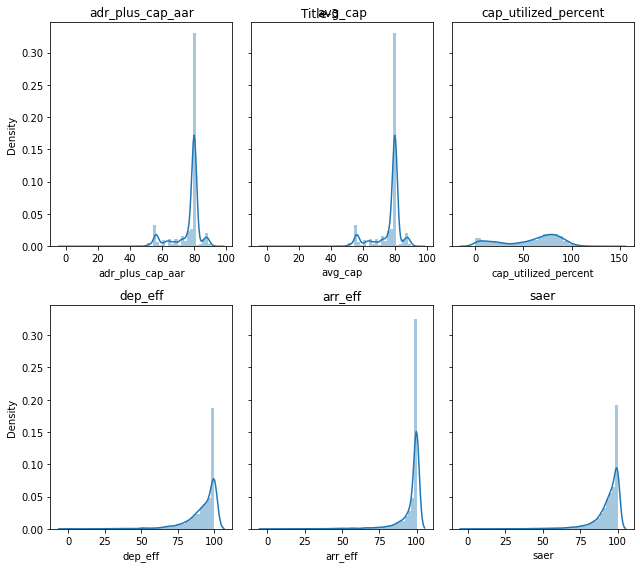

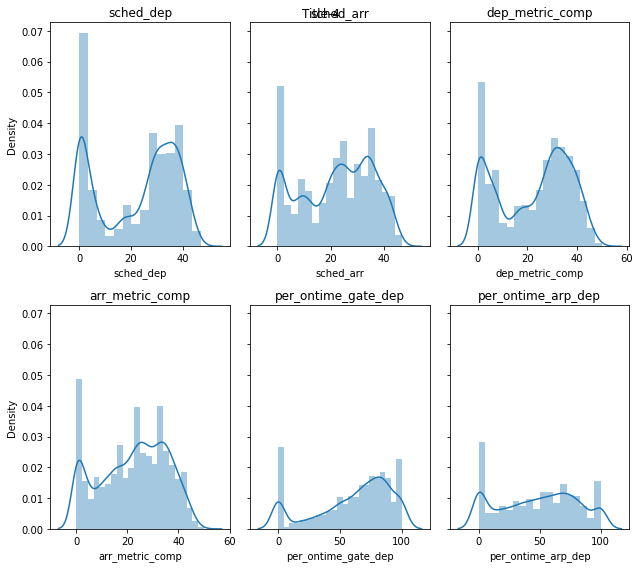

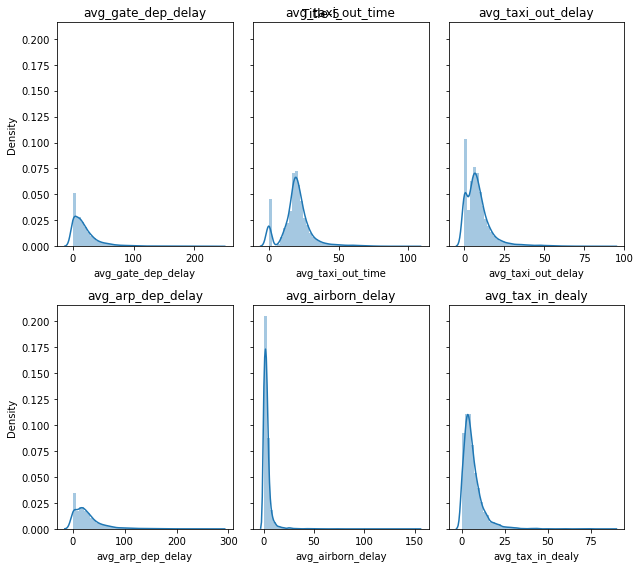

In [ ]:
## Univariate Analysis

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)



def uni_plot(title,var1,var2,var3,var4,var5,var6):
  fig, axes = plt.subplots(2, 3, figsize=(9, 8), sharey=True)
  fig.suptitle(title)

  sns.distplot(df[var1],ax=axes[0,0])
  axes[0,0].set_title(var1)

  sns.distplot(df[var2],ax=axes[0,1])
  axes[0,1].set_title(var2)

  sns.distplot(df[var3],ax=axes[0,2])
  axes[0,2].set_title(var3)

  sns.distplot( df[var4],ax=axes[1,0])
  axes[1,0].set_title(var4)

  sns.distplot(df[var5],ax=axes[1,1])
  axes[1,1].set_title(var5)

  sns.distplot(df[var6],ax=axes[1,2])
  axes[1,2].set_title(var6)

  plt.tight_layout()
  plt.show();

uni_plot('Title-1','dep_eff_comp', 'arr_eff_comp', 'total_eff_comp',
       'dep_facility_rep','arr_facility_rep', 'total_facility_rep')
uni_plot('Title-2','dep_demand_units', 'arr_demand_units',
         'total_demand_units', 'eff_aar',
       'adr', 'cap_aar')
uni_plot('Title-3','adr_plus_cap_aar', 'avg_cap', 'cap_utilized_percent',
       'dep_eff', 'arr_eff','saer')
uni_plot('Title-4','sched_dep', 'sched_arr',
       'dep_metric_comp', 'arr_metric_comp', 'per_ontime_gate_dep',
       'per_ontime_arp_dep')
uni_plot('Title-5','avg_gate_dep_delay',
       'avg_taxi_out_time', 'avg_taxi_out_delay', 'avg_arp_dep_delay',
       'avg_airborn_delay', 'avg_tax_in_dealy')


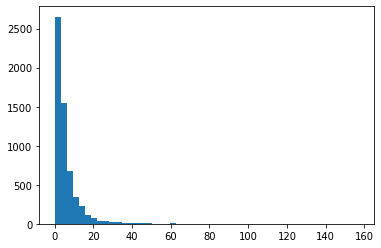

In [ ]:
plt.hist(df['avg_block_delay'], bins=50);

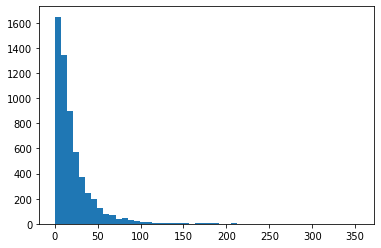

In [ ]:
plt.hist(df['avg_gate_arr_delay'], bins=50);

In [ ]:
### Bivariate Analysis

In [ ]:
def extract(target):
    store=[]
    for i in range(len(target)):
        for j in range(len(target.columns)):
            if i==j: 
                i+=1
                j=0
            if i>=len(target) or j>=len(target.columns): continue
            if target.iloc[i,j]>0.7 and target.iloc[i,j]<1: 
                store.append((i,j))
    return store

             

In [ ]:
s=extract(df.corr())

In [ ]:
target=df.corr()


In [ ]:
# list = []
# for row in target.index:
#     list.append(row)
#     list.append(target.columns[target.loc[row].gt(0.7)].tolist())
# print(list)

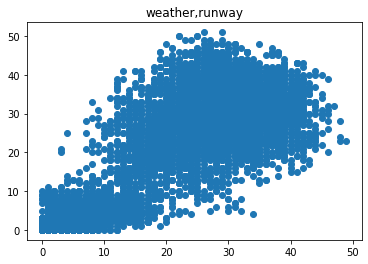

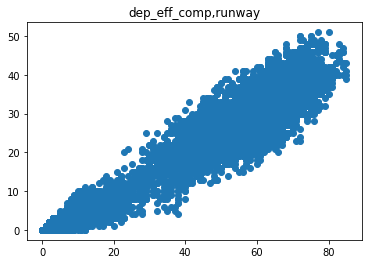

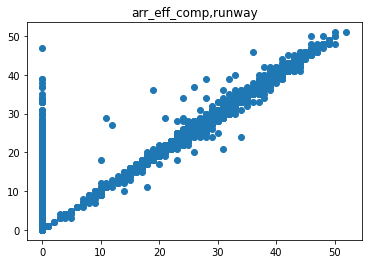

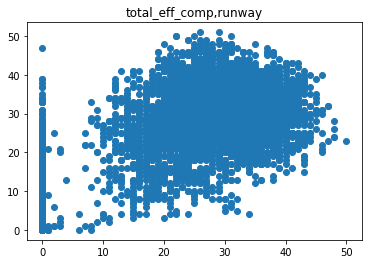

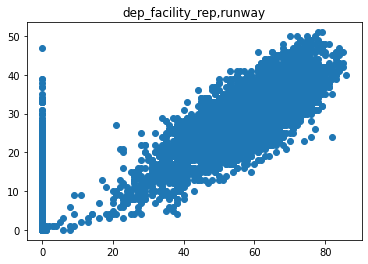

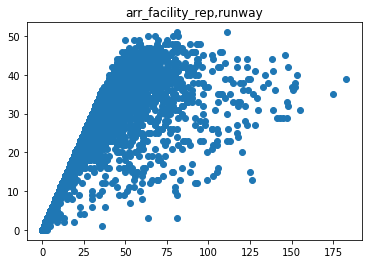

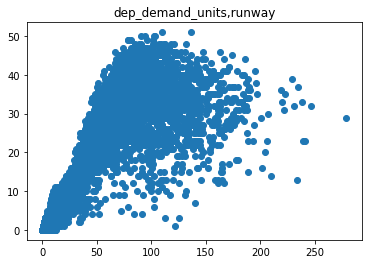

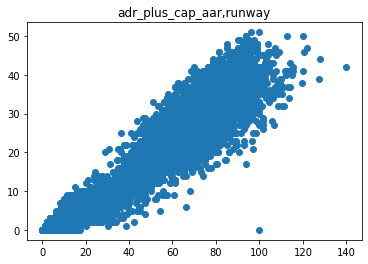

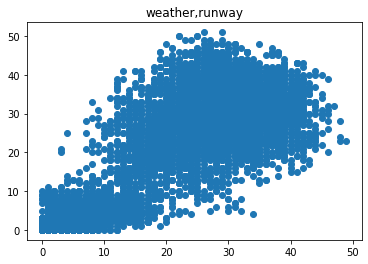

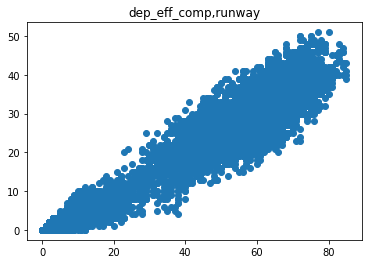

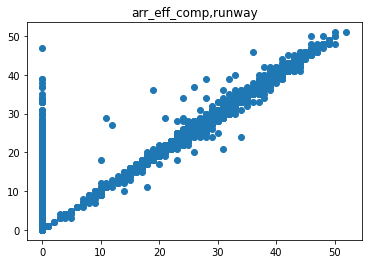

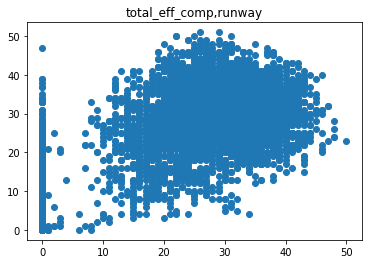

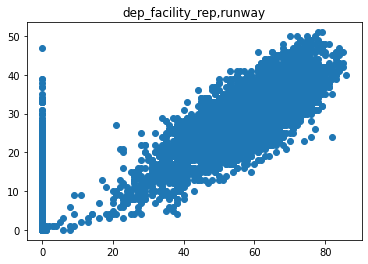

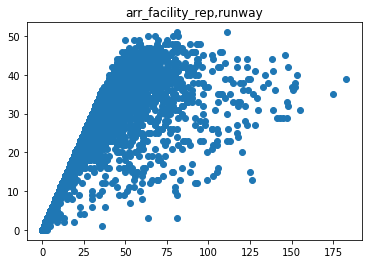

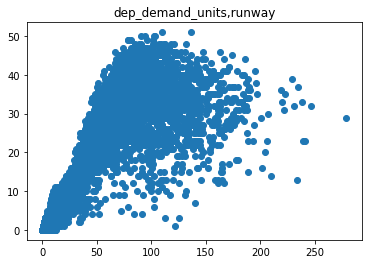

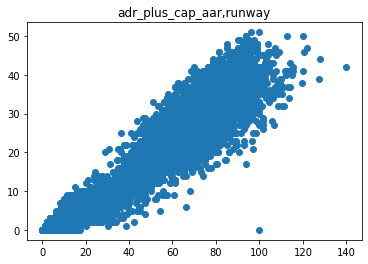

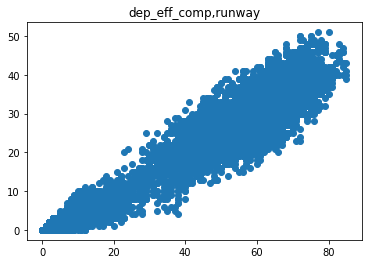

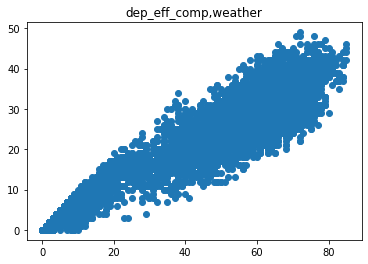

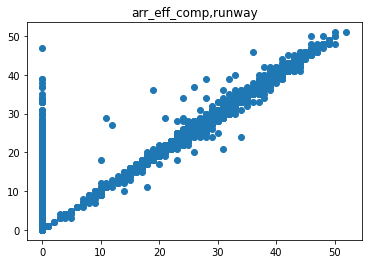

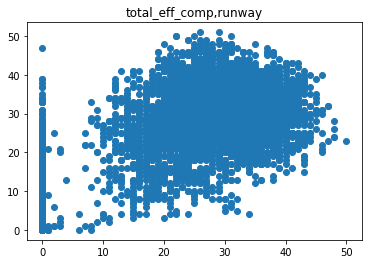

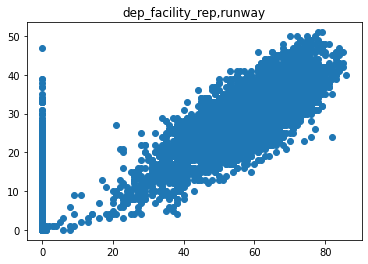

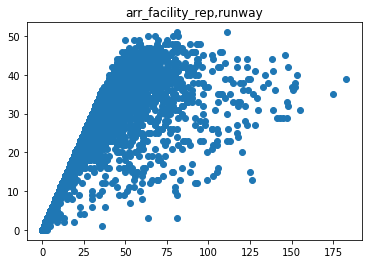

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
for x,y in s:
    plt.scatter(x=df[target.index[x]],y=df[target.index[y]])
    plt.title(f'{df.columns[x]},{df.columns[y]}')
    plt.show();

In [ ]:
## Correlogram PLots - Autocorrelation Vs. Lag Plots
plt.figure(figsize=(16,8))
for i in df.columns.drop(['runway','weather']):
    pd.plotting.autocorrelation_plot(df[i], alpha=0.3)
    plt.title(i)
    plt.show();

In [ ]:
## This plot suggests covariance is stationary thats why correlogram plot damps to zero.
plt.figure(figsize=(16,8))
pd.plotting.autocorrelation_plot(df['dep_eff_comp'], alpha=0.6 );

In [ ]:
plt.plot(df['dep_eff_comp']);
plt.show()

In [ ]:
### Autocorrelation, falling to zero shows covariance stationarity, p value should be less than 0.05.
## dep_eff_comp
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df['dep_eff_comp'],autolag='BIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                -1.095743e+01
p-value                        8.492435e-20
#lags used                     3.300000e+01
number of observations used    5.762000e+03
critical value (1%)           -3.431485e+00
critical value (5%)           -2.862042e+00
critical value (10%)          -2.567037e+00
dtype: float64


In [ ]:
### adr
print("Observations of Dickey-fuller test")
dftest = adfuller(df['adr'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                -1.053944e+01
p-value                        8.726997e-19
#lags used                     2.500000e+01
number of observations used    5.770000e+03
critical value (1%)           -3.431484e+00
critical value (5%)           -2.862041e+00
critical value (10%)          -2.567037e+00
dtype: float64


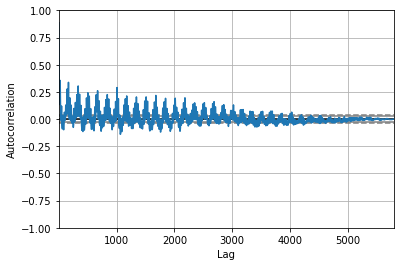

In [ ]:
pd.plotting.autocorrelation_plot(df['adr'])

In [ ]:
import numpy as np

In [ ]:
np.cov(df['adr'])

array(18.2986543)

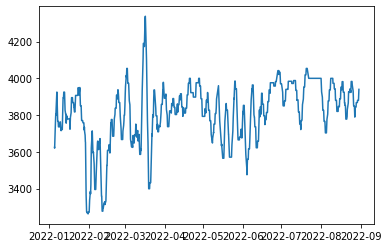

In [ ]:
plt.plot(df['adr'].rolling(100).sum())

In [ ]:
## BOX PLOTS, Violin Plot - Outlier Handling

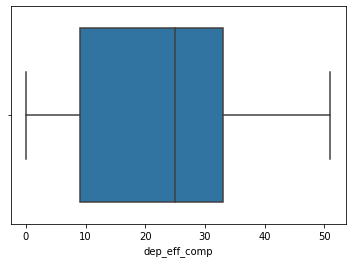

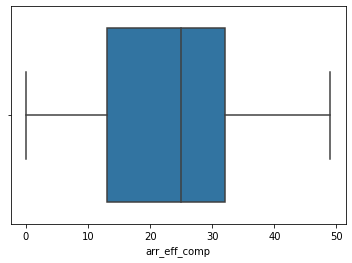

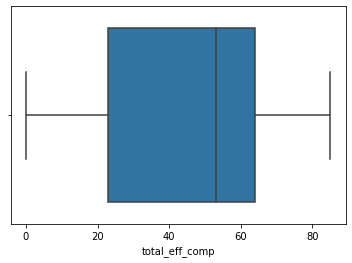

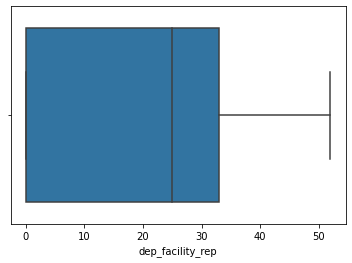

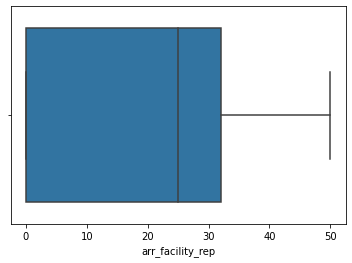

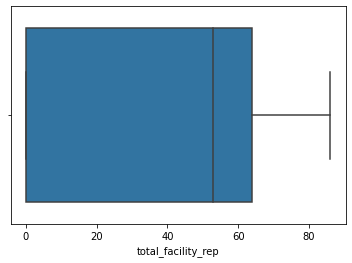

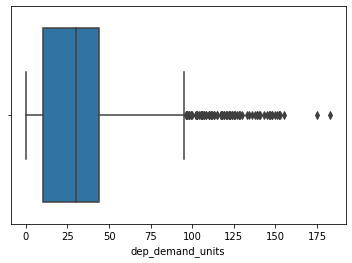

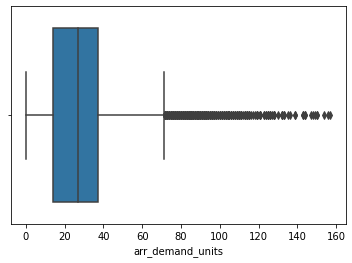

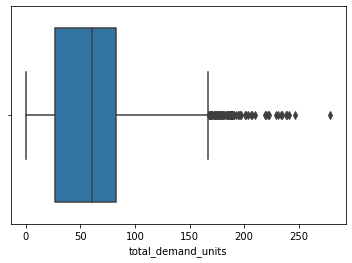

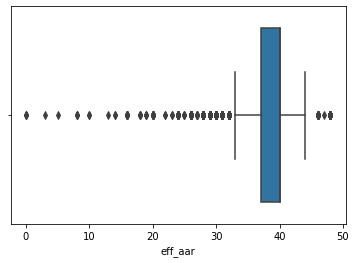

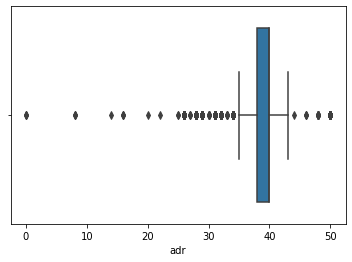

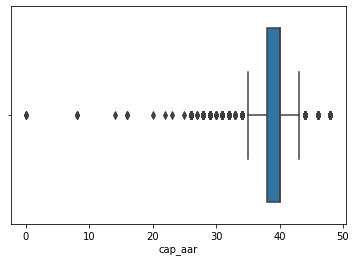

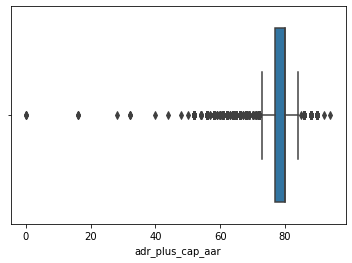

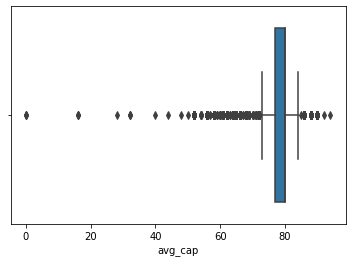

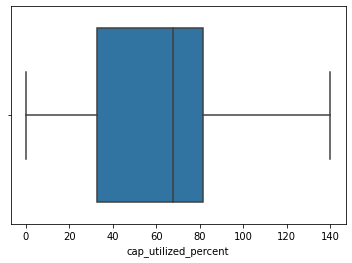

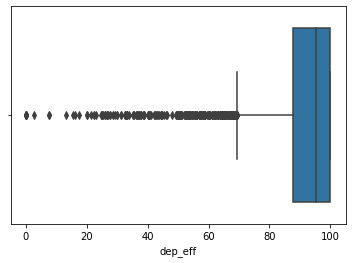

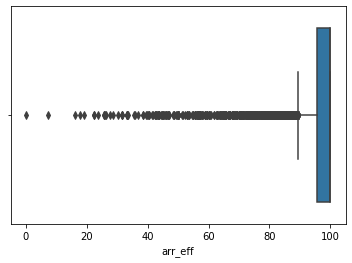

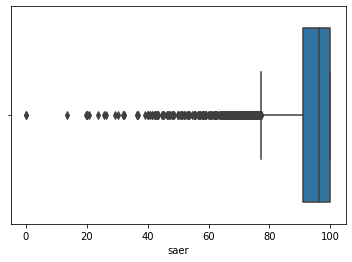

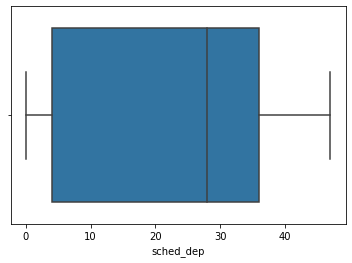

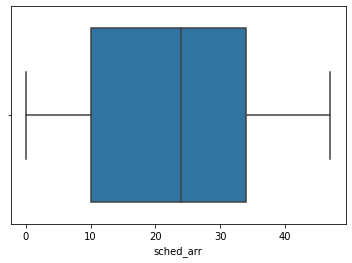

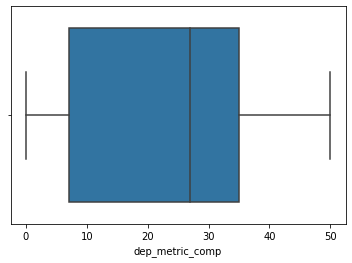

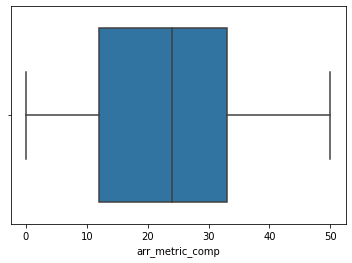

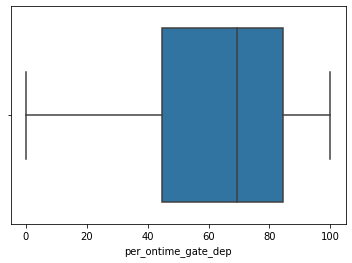

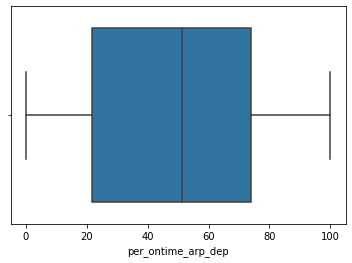

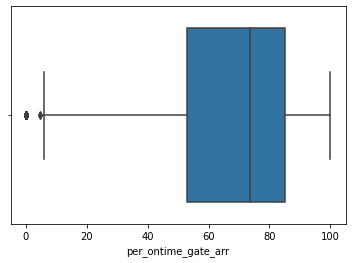

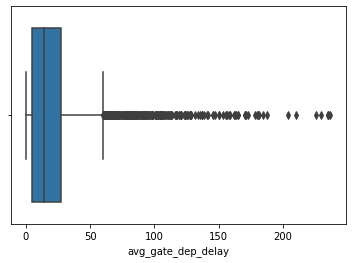

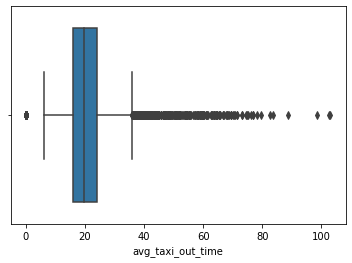

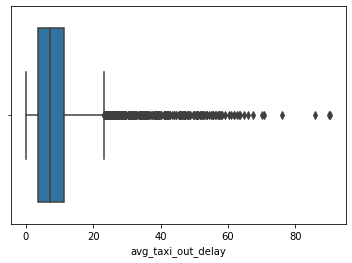

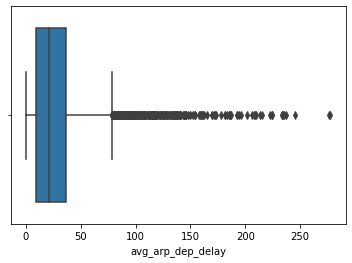

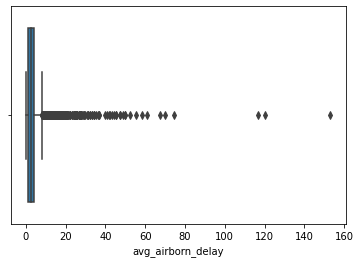

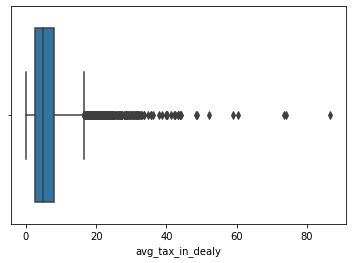

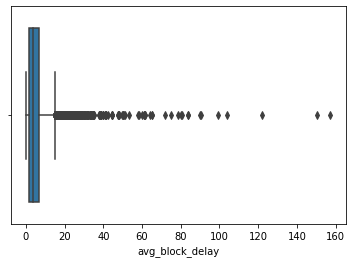

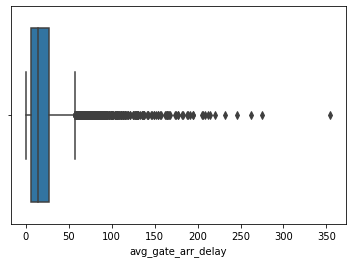

In [ ]:
for i in df.columns.drop(['runway','weather']):
    sns.boxplot(df[i])
    plt.show();

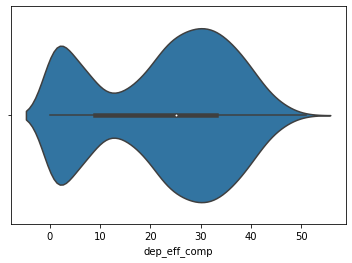

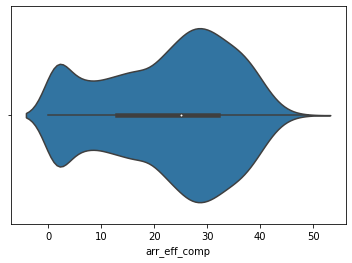

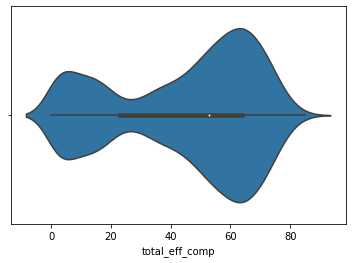

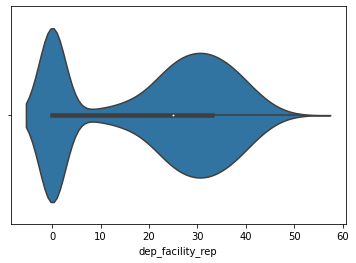

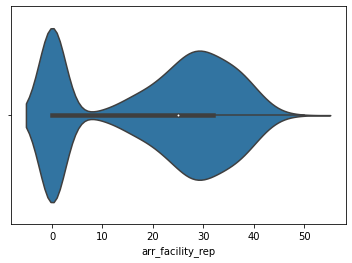

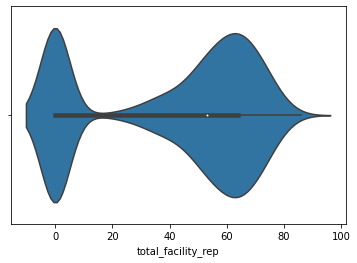

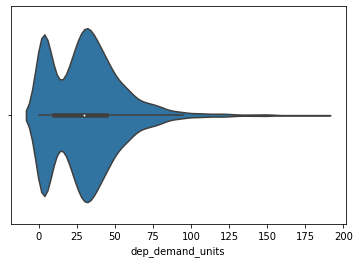

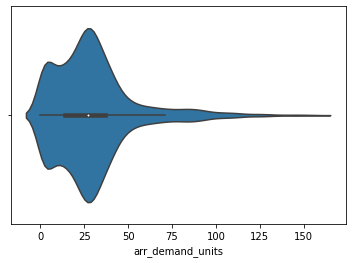

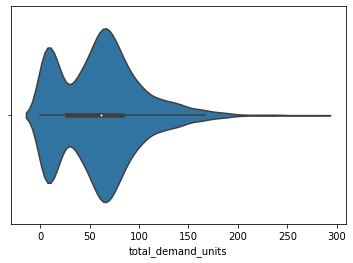

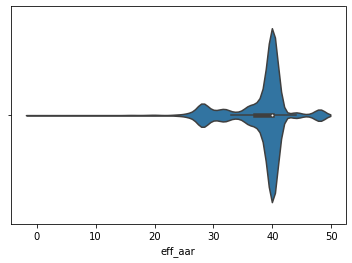

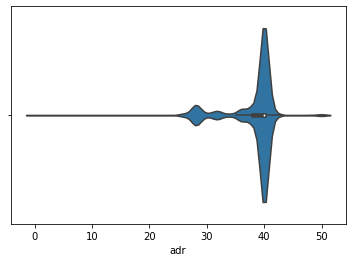

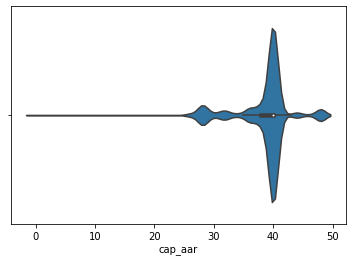

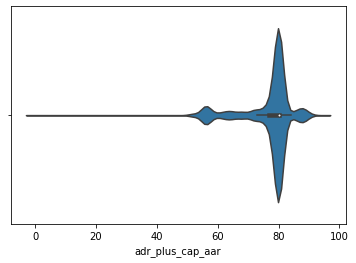

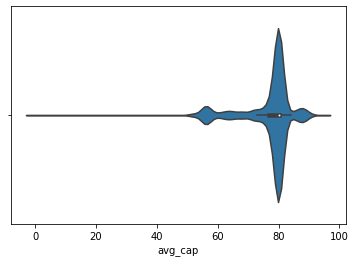

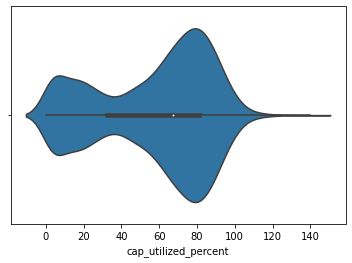

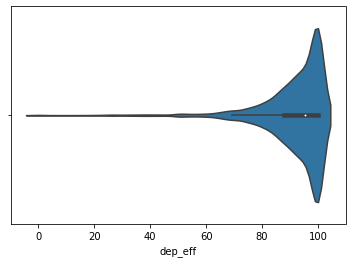

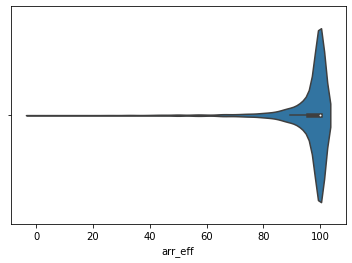

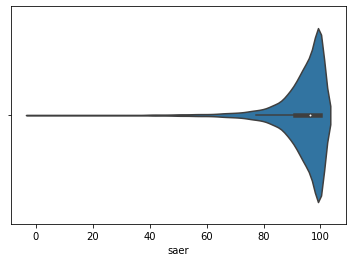

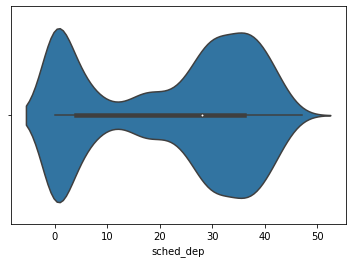

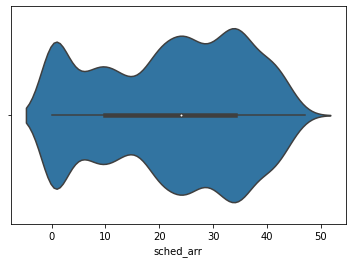

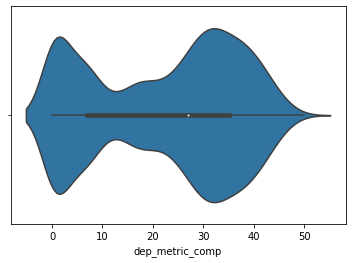

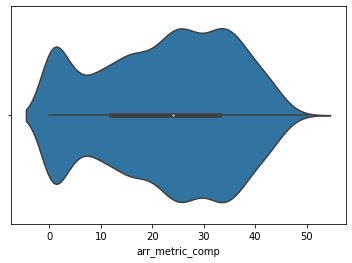

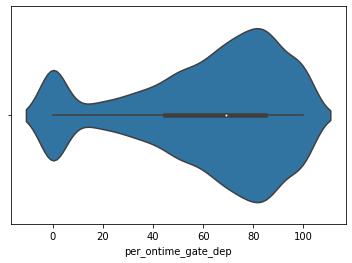

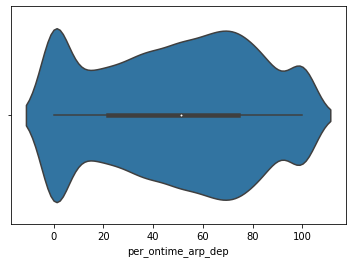

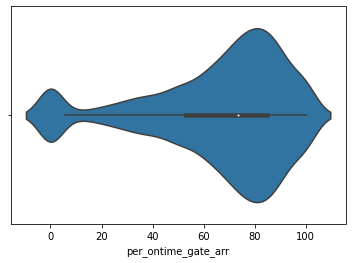

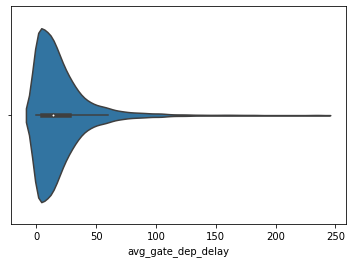

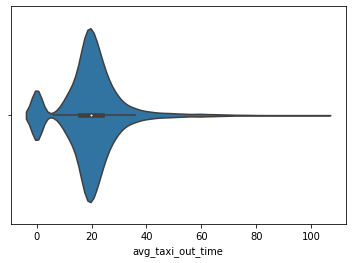

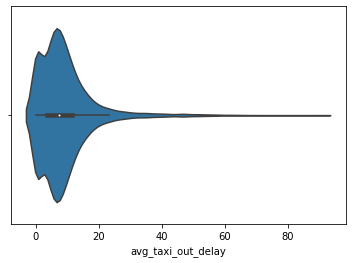

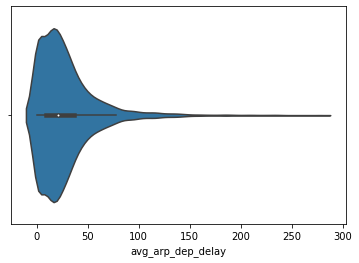

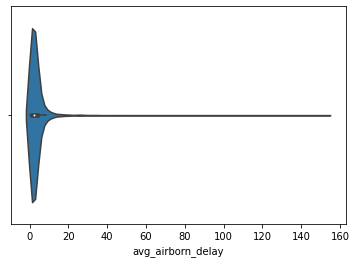

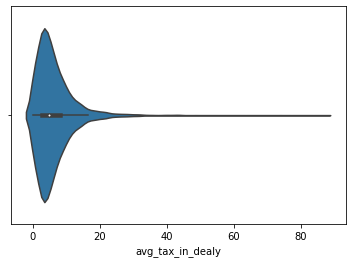

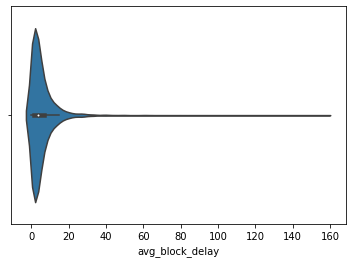

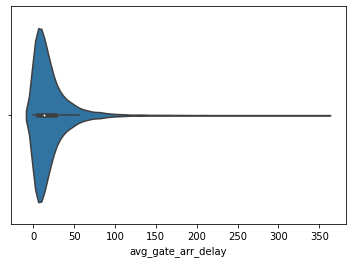

In [ ]:
for i in df.columns.drop(['runway','weather']):
    sns.violinplot(df[i])
    plt.show();

In [ ]:
pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14605 sha256=d8781c311d78cdbaec40c56732eb818ffed4427cbf0f0e5632e565d19f019608
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [ ]:
import pyforest as pf

Text(0.5, 1.0, 'Departure computed, facility, demand')

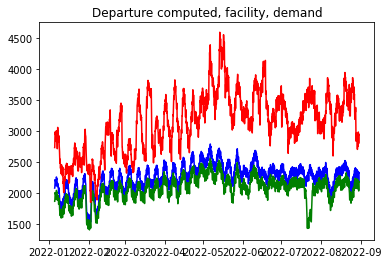

In [ ]:
plt.plot(df['dep_eff_comp'].rolling(100).sum(), color='b') 
plt.plot(df['dep_facility_rep'].rolling(100).sum(), color='g')
plt.plot(df['dep_demand_units'].rolling(100).sum(), color='r')

plt.title('Departure computed, facility, demand')

Text(0.5, 1.0, 'Arrival computed, facility, demand')

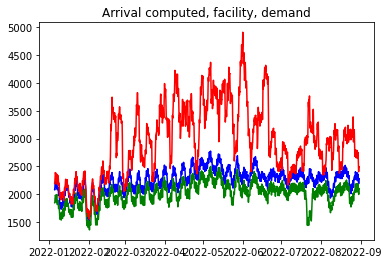

In [ ]:
plt.plot(df['arr_eff_comp'].rolling(100).sum(), color='b') 
plt.plot(df['arr_facility_rep'].rolling(100).sum(), color='g')
plt.plot(df['arr_demand_units'].rolling(100).sum(), color='r')

plt.title('Arrival computed, facility, demand')

### Demand is more than the capacity, estimation

### Applying regression - target -  total demand units, features excludes arr, dep and total demand units

In [10]:
df.columns

Index(['runway', 'weather', 'dep_eff_comp', 'arr_eff_comp', 'total_eff_comp',
       'dep_facility_rep', 'arr_facility_rep', 'total_facility_rep',
       'dep_demand_units', 'arr_demand_units', 'total_demand_units', 'eff_aar',
       'adr', 'cap_aar', 'adr_plus_cap_aar', 'avg_cap', 'cap_utilized_percent',
       'dep_eff', 'arr_eff', 'saer', 'sched_dep', 'sched_arr',
       'dep_metric_comp', 'arr_metric_comp', 'per_ontime_gate_dep',
       'per_ontime_arp_dep', 'per_ontime_gate_arr', 'avg_gate_dep_delay',
       'avg_taxi_out_time', 'avg_taxi_out_delay', 'avg_arp_dep_delay',
       'avg_airborn_delay', 'avg_tax_in_dealy', 'avg_block_delay',
       'avg_gate_arr_delay'],
      dtype='object')

In [21]:
weather_dict = {
    'IMC': 0, 
    'VMC': 1
}

df['weather_vector'] = df['weather'].map(weather_dict).astype('int')

print(df)

                              runway weather  dep_eff_comp  arr_eff_comp  \
date                                                                       
2022-01-01 00:00:00+00:00  22L | 22R     IMC             5            10   
2022-01-01 01:00:00+00:00  22L | 22R     IMC             2             3   
2022-01-01 02:00:00+00:00  22L | 22R     IMC             0             0   
2022-01-01 03:00:00+00:00  22L | 22R     IMC             1             1   
2022-01-01 04:00:00+00:00  22L | 22R     IMC             0             2   
...                              ...     ...           ...           ...   
2022-08-30 02:00:00+00:00  22L | 22R     IMC             0             2   
2022-08-30 03:00:00+00:00  22L | 22R     IMC             5             3   
2022-08-30 04:00:00+00:00  22L | 22R     IMC             8             7   
2022-08-30 05:00:00+00:00  22L | 22R     IMC             3            13   
2022-08-30 06:00:00+00:00  22L | 22R     IMC            22            23   

           

In [54]:
features = df.drop(['runway', 'weather', 'dep_eff_comp', 'arr_eff_comp', 'total_eff_comp',
       'dep_facility_rep', 'total_facility_rep',
       'dep_demand_units', 'total_demand_units',
       'adr', 'cap_utilized_percent',
       'dep_eff', 'sched_dep', 'saer',
       'dep_metric_comp', 'per_ontime_gate_dep',
       'per_ontime_arp_dep', 'avg_gate_dep_delay', 'avg_taxi_out_delay', 'avg_arp_dep_delay',
       'avg_airborn_delay', 'avg_tax_in_dealy', 'avg_block_delay',
       'avg_gate_arr_delay'], axis=1)
target = df['arr_eff_comp']

In [55]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5791 entries, 2022-01-01 00:00:00+00:00 to 2022-08-30 06:00:00+00:00
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   arr_facility_rep     5791 non-null   int64  
 1   arr_demand_units     5791 non-null   int64  
 2   eff_aar              5791 non-null   int64  
 3   cap_aar              5791 non-null   int64  
 4   adr_plus_cap_aar     5791 non-null   int64  
 5   avg_cap              5791 non-null   float64
 6   arr_eff              5791 non-null   float64
 7   sched_arr            5791 non-null   int64  
 8   arr_metric_comp      5791 non-null   int64  
 9   per_ontime_gate_arr  5791 non-null   float64
 10  avg_taxi_out_time    5791 non-null   float64
 11  weather_vector       5791 non-null   int32  
dtypes: float64(4), int32(1), int64(7)
memory usage: 565.5 KB


In [57]:
len(features)*0.7

4053.7

In [58]:
X_train, X_test = features[:4056], features[4056:]
y_train, y_test = target[:4056], target[4056:]

In [ ]:
### Split data according to time -series, the below code is wrong.
# X_train, X_test, y_train, y_test = pf.train_test_split(features, target, random_state=42, test_size=0.30)

In [ ]:
!pip install lazypredict

In [ ]:
### importing lazypredict library
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyRegressor

In [ ]:
clf = LazyRegressor(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
data=pd.DataFrame(models)
data

In [ ]:
!pip install pycaret

In [ ]:
# from pycaret.regression import *
# reg1 = setup(data = features, target = target)
# # return best model
# best = compare_models()
# # return top 3 models based on 'R2'
# top3 = compare_models(n_select = 3)
# # return best model based on MAPE
# best = compare_models(sort = 'MAPE') #default is 'R2'
# # compare specific models
# best_specific = compare_models(include = ['dt','rf','br'])
# # blacklist certain models
# best_specific = compare_models(exclude = [ 'svm'])

In [ ]:
#https://neptune.ai/blog/arima-vs-prophet-vs-lstm

In [ ]:
# pip uninstall scikit-learn --y

In [ ]:
# pip install scikit-learn==0.23.2

In [59]:
import sklearn

In [60]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [61]:
ETR_model = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
print(ETR_model.score(X_test, y_test))
RFR_model = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
print(ETR_model.score(X_test, y_test))
HGBR_model =  HistGradientBoostingRegressor().fit(X_train, y_train)
print(HGBR_model.score(X_test, y_test))
#these models minimise variance

0.9918575864198923
0.9918575864198923
0.9931252188741894


In [62]:
ETR_predict = ETR_model.predict(X_test)
print(ETR_predict)
RFR_predict = RFR_model.predict(X_test)
print(RFR_predict)
HGBR_predict = HGBR_model.predict(X_test)
print(HGBR_predict)

[14.    2.    2.   ...  6.98 12.84 23.07]
[14.    2.    2.   ...  7.   13.   23.04]
[13.97926788  2.01158445  2.01158445 ...  7.02413257 12.9928833
 22.62555676]


In [65]:
import sklearn.metrics as sm
print('============================================ ETR ============================================')
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, ETR_predict), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, ETR_predict), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, ETR_predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, ETR_predict), 2)) 
print("R2 score =", round(sm.r2_score(y_test, ETR_predict), 2))

print('============================================ RFR ============================================')
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, RFR_predict), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, RFR_predict), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, RFR_predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, RFR_predict), 2)) 
print("R2 score =", round(sm.r2_score(y_test, RFR_predict), 2))

print('============================================ HGBR ============================================')
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, HGBR_predict), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, HGBR_predict), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, HGBR_predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, HGBR_predict), 2)) 
print("R2 score =", round(sm.r2_score(y_test, HGBR_predict), 2))

============================================ ETR ============================================
Mean absolute error = 0.44
Mean squared error = 1.13
Median absolute error = 0.11
Explain variance score = 0.99
R2 score = 0.99
============================================ RFR ============================================
Mean absolute error = 0.4
Mean squared error = 1.15
Median absolute error = 0.04
Explain variance score = 0.99
R2 score = 0.99
============================================ HGBR ============================================
Mean absolute error = 0.4
Mean squared error = 0.95
Median absolute error = 0.12
Explain variance score = 0.99
R2 score = 0.99


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

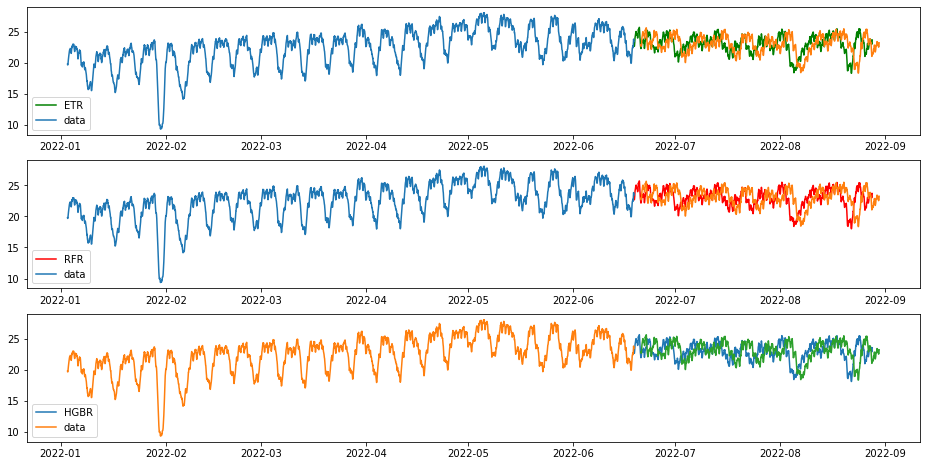

In [63]:
plt.figure(figsize=(16,8))
plt.subplot(3,1,1)
plt.plot(y_test.index.values[:-49], moving_average(ETR_predict, n=50), label='ETR', color='g')
plt.plot(y_train.rolling(50).mean(), label='data')
plt.plot(y_test.rolling(50).mean())
plt.legend()

plt.subplot(3,1,2)
plt.plot(y_test.index.values[:-49], moving_average(RFR_predict, n=50), label='RFR',color='r')
plt.plot(y_train.rolling(50).mean(), label='data')
plt.plot(y_test.rolling(50).mean())
plt.legend()

plt.subplot(3,1,3)
plt.plot(y_test.index.values[:-49], moving_average(HGBR_predict, n=50), label='HGBR')
plt.plot(y_train.rolling(50).mean(), label='data')
plt.plot(y_test.rolling(50).mean())
plt.legend()
plt.show()

In [73]:

import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
 
# printing the summary table
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:           arr_eff_comp   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                          1.567e+04
Date:                Mon, 28 Nov 2022   Prob (F-statistic):                        0.00
Time:                        18:42:39   Log-Likelihood:                         -11233.
No. Observations:                4056   AIC:                                  2.249e+04
Df Residuals:                    4045   BIC:                                  2.256e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [75]:
!pip install scalecast

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
cookiecutter 1.7.2 requires Jinja2<3.0.0, but you have jinja2 3.1.2 which is incompatible.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.1.1 which is incompatible.


  Created wheel for scalecast: filename=SCALECAST-0.15.9-py3-none-any.whl size=109868 sha256=4ef08b164ce0e04221fae75d06739874b92cb57c8b53d4042e7d272e3b943ec9
  Stored in directory: c:\users\hinal\appdata\local\pip\cache\wheels\72\93\4a\1bd432b3c1e82a7bafac72c9b285d30c2bad198ffb72aea45a
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=830083df00727eccdf9cfc32a039a1aceb7bd602e9f5c681f2f696d436c46392
  Stored in directory: c:\users\hinal\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built scalecast eli5
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


181/181 [==============================] - 5s 12ms/step - loss: 0.1830


<AxesSubplot:xlabel='Date', ylabel='Values'>

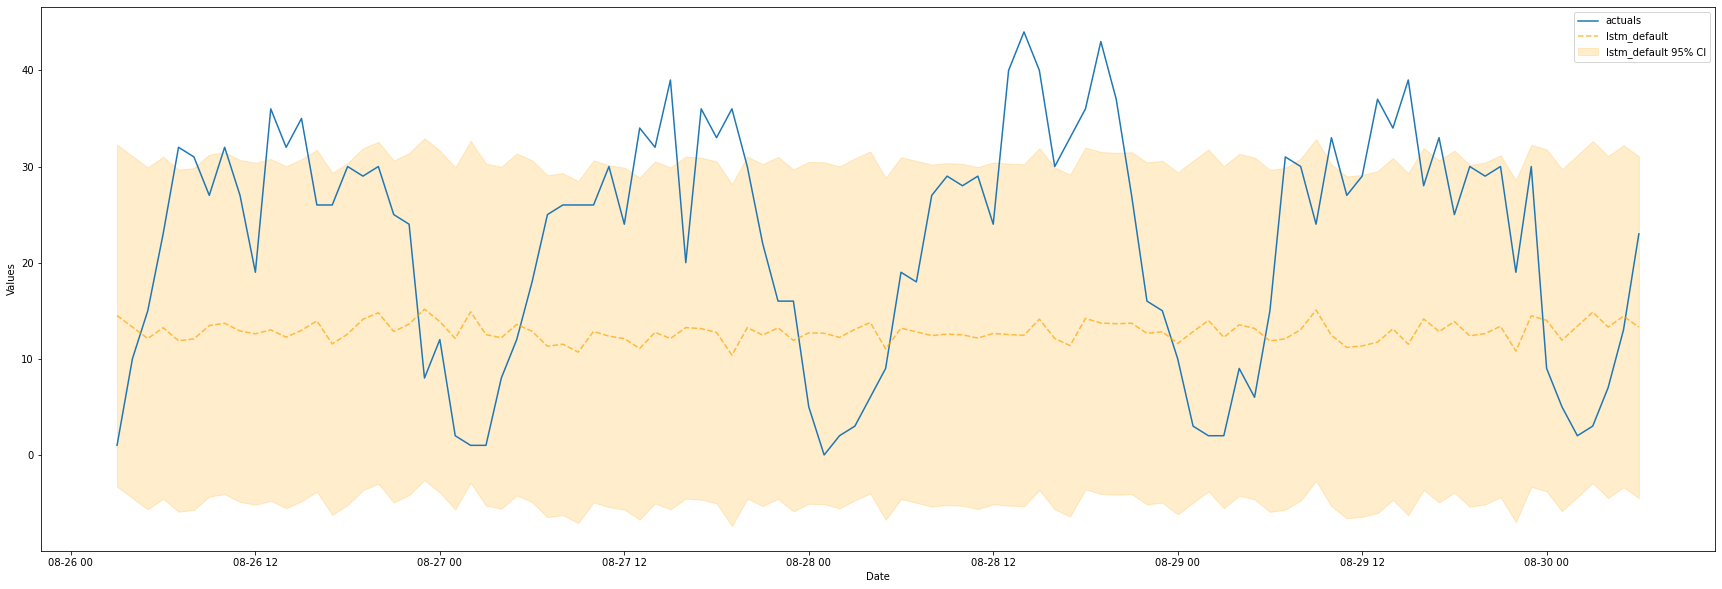

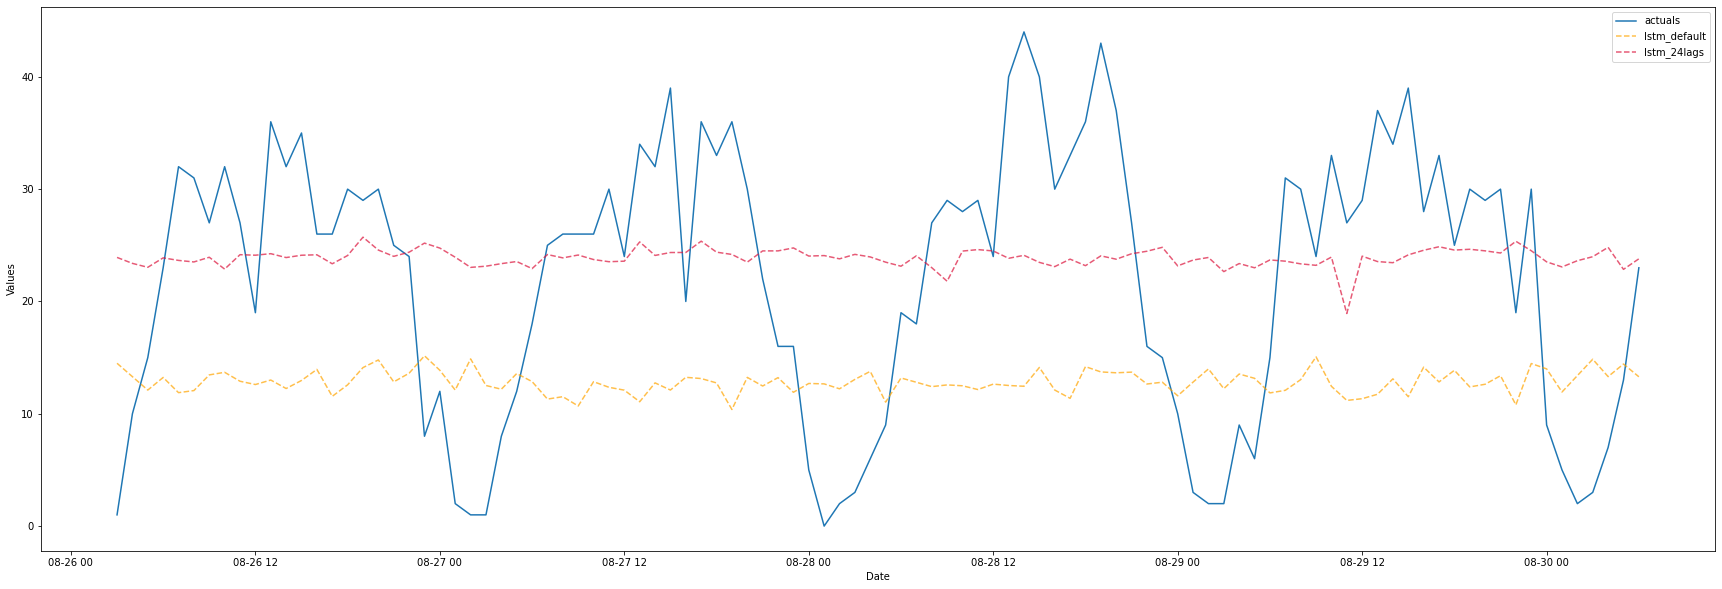

In [76]:
from scalecast.Forecaster import Forecaster
f = Forecaster(y=df['arr_eff_comp'], current_dates=df.index.values)
f.set_test_length(100)       # 1. 12 observations to test the results
f.generate_future_dates(1) # 2. 12 future points to forecast
f.set_estimator('lstm')
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True, figsize=(30,10),include_train=False)

f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=False,figsize=(30,10),include_train=False)